正規分布風の分布を出力する

<AxesSubplot:ylabel='Density'>

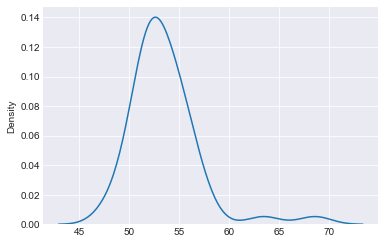

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

import pymc3 as pm
import pandas as pd
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 
                55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 
                57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 
                51.94, 54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
                53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16])

sns.kdeplot(data)

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 10 seconds.
/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

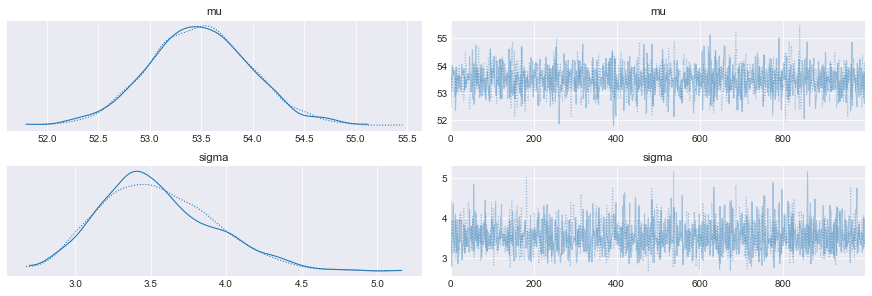

In [4]:
with pm.Model() as model:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace_g = pm.sample(1100)

chain_g = trace_g[100:]
pm.traceplot(chain_g)

In [6]:
df = pm.summary(chain_g)

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [7]:
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,53.48,0.50,52.63,54.52,1.20e-02,8.00e-03,1801.0,1800.0,1806.0,1291.0,1.0
sigma,3.54,0.38,2.86,4.22,9.00e-03,6.00e-03,1710.0,1693.0,1711.0,1471.0,1.0


データのKDEと100組みの事後予測サンプルのKDE（正規分布）を出力する

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


ValueError: If using all scalar values, you must pass an index

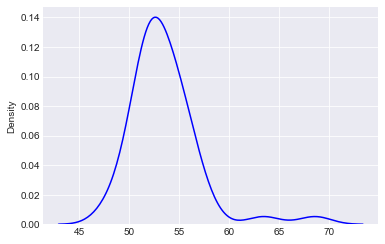

In [12]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.show()

In [17]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

0.5261463537897929

スチューデントのt分布(自由度1,2,5,30)と正規分布(自由度∞)を出力する

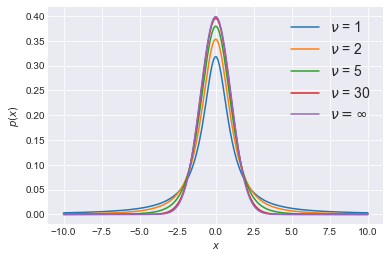

In [18]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r"$\nu$ = {}".format(df))
    
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend(loc=0, fontsize=14)

スチューデントのt分布を含むモデルのKDEとトレースプロットを出力する

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 9 seconds.
/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}>]], dtype=object)

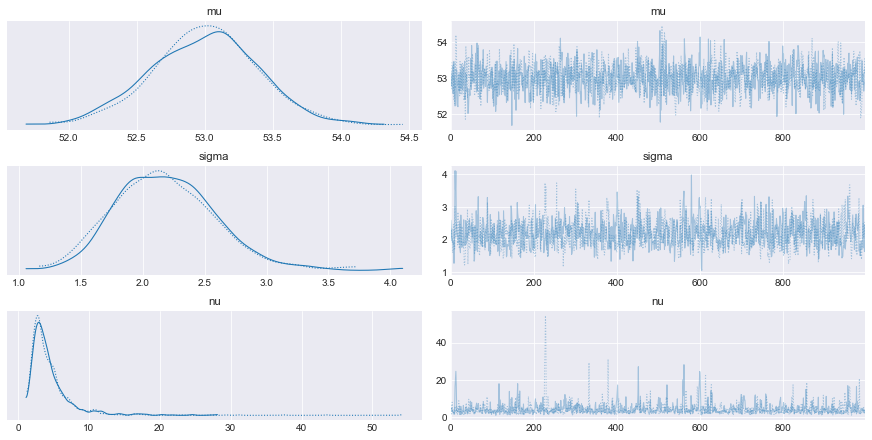

In [20]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sigma=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100)
    
chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [21]:
pm.summary(chain_t)

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,53.00,0.39,52.23,53.72,0.01,7.00e-03,1464.0,1464.0,1464.0,1398.0,1.0
sigma,2.19,0.41,1.47,2.94,0.01,9.00e-03,1047.0,1047.0,1047.0,1088.0,1.0
nu,4.48,3.38,1.32,9.24,0.12,9.00e-02,795.0,709.0,950.0,1090.0,1.0


正規分布を使ったモデルと比較して、
<ul>
    <li>μの平均値は0.5程度の違いで、ほぼ同じ</li>
    <li>σの平均値は約3.5から約2.1へと小さくなっており、外れ値の影響を減らすことができている</li>
    <li>自由度は約4で、正規分布と比較して厚い裾を持った分布になっている</li>
</ul>

チップのデータセットを使用する

In [22]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


チップのデータセットのヴァイオリンプロットを出力する

<AxesSubplot:xlabel='day', ylabel='tip'>

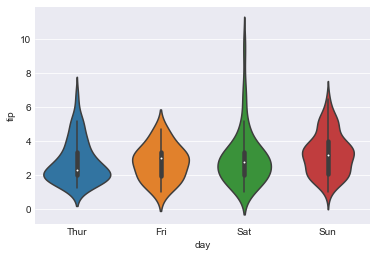

In [23]:
sns.violinplot(x='day', y='tip', data=tips)

チップのデータセットのKDEとトレースプロットを出力する

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sds, means]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 18 seconds.


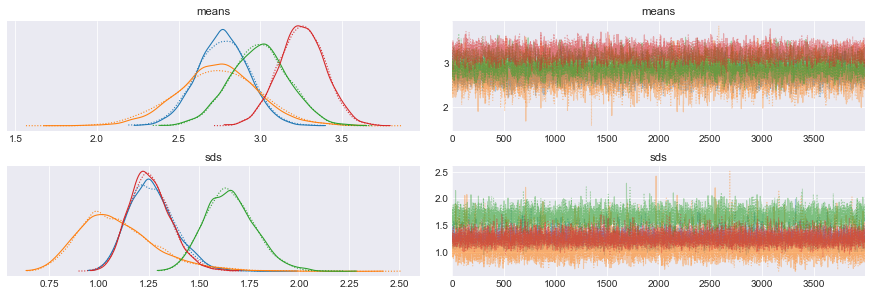

In [25]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))
    
    y = pm.Normal('y', mu=means[idx], sd=sds[idx], observed=y)
    
    trace_cg = pm.sample(5000)
    chain_cg = trace_cg[1000:]
    pm.traceplot(chain_cg)

In [26]:
pm.summary(chain_cg)

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
means[0],2.77,0.16,2.46,3.07,2.00e-03,1.00e-03,10533.0,10504.0,10553.0,6765.0,1.0
means[1],2.74,0.25,2.25,3.21,3.00e-03,2.00e-03,8753.0,8753.0,8825.0,5811.0,1.0
means[2],2.99,0.18,2.65,3.32,2.00e-03,1.00e-03,10390.0,10390.0,10389.0,6170.0,1.0
means[3],3.25,0.14,2.98,3.52,2.00e-03,1.00e-03,8612.0,8595.0,8616.0,6184.0,1.0
sds[0],1.26,0.12,1.05,1.48,1.00e-03,1.00e-03,8300.0,8069.0,8599.0,6070.0,1.0
sds[1],1.10,0.20,0.76,1.47,2.00e-03,2.00e-03,8757.0,7993.0,9758.0,5784.0,1.0
sds[2],1.65,0.13,1.42,1.89,1.00e-03,1.00e-03,8539.0,8345.0,8776.0,6361.0,1.0
sds[3],1.25,0.11,1.07,1.46,1.00e-03,1.00e-03,7020.0,6889.0,7214.0,5875.0,1.0


曜日間のチップ額の差の参照点0とHPDを出力する

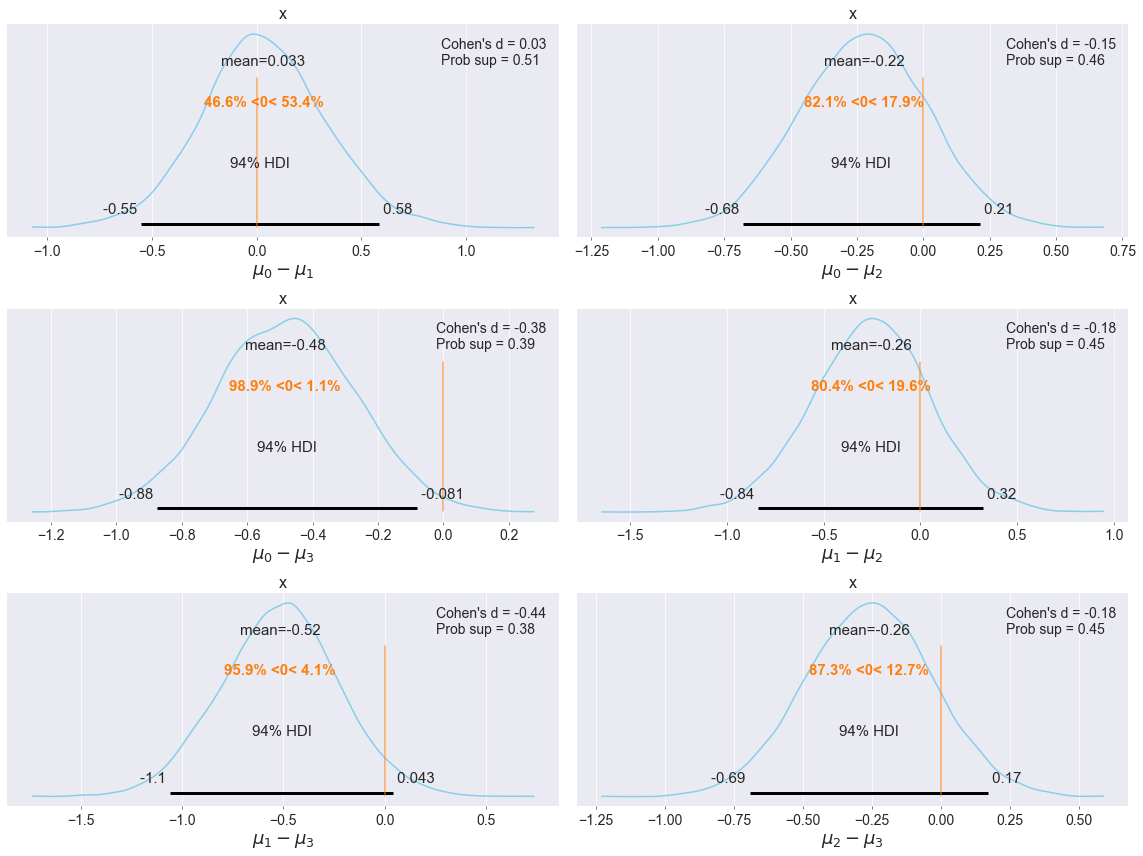

In [29]:
dist = stats.norm()
_, ax = plt.subplots(3, 2, figsize=(16, 12))

comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]
pos = [(k, l) for k in range(3) for l in (0, 1)]

for (i, j), (k, l) in zip(comparisons, pos):
    
    # 曜日間の差分
    means_diff = chain_cg['means'][:,i]-chain_cg['means'][:,j]

    # コーエンのd
    d_cohen = (means_diff / np.sqrt((chain_cg['sds'][:,i]**2 + chain_cg['sds'][:,j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    
    pm.plot_posterior(means_diff, ref_val=0, ax=ax[k,l], color='skyblue', kind="kde")
    ax[k,l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps), alpha=0)
    ax[k,l].set_xlabel('$\mu_{}-\mu_{}$'.format(i,j), fontsize=18)
    ax[k,l].legend(loc=0, fontsize=14)
plt.tight_layout()

階層モデルのKDEとトレースプロットを出力する

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 16 seconds.
There were 168 divergences after tuning. Increase `target_accept` or reparameterize.
There were 166 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

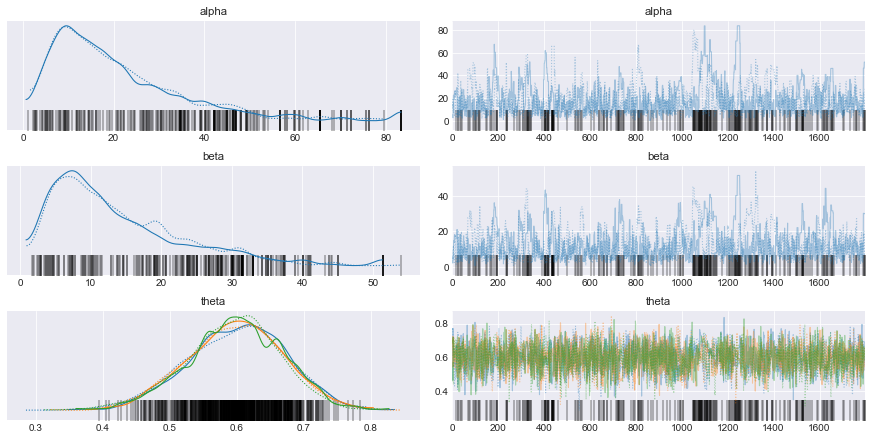

In [34]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))
    
with pm.Model() as model_h:
    
    # 階層化部分
    alpha = pm.HalfCauchy('alpha', beta=10)
    beta = pm.HalfCauchy('beta', beta=10)
    theta = pm.Beta('theta', alpha, beta, shape=len(N_samples))

    y = pm.Bernoulli('y', p=theta[group_idx], observed=data)
    
    trace_h = pm.sample(2000)
    
chain_h = trace_h[200:]
pm.traceplot(chain_h)

In [35]:
pm.summary(chain_h)

/Users/kohei/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,20.39,14.30,2.37,46.94,1.09e+00,8.07e-01,171.0,157.0,222.0,195.0,1.01
beta,13.64,9.08,2.17,31.55,6.71e-01,4.91e-01,183.0,172.0,227.0,256.0,1.01
theta[0],0.60,0.07,0.46,0.73,2.00e-03,2.00e-03,969.0,963.0,974.0,1646.0,1.00
theta[1],0.60,0.07,0.46,0.73,2.00e-03,1.00e-03,1223.0,1223.0,1223.0,1446.0,1.00
theta[2],0.60,0.07,0.46,0.73,2.00e-03,2.00e-03,981.0,981.0,986.0,1400.0,1.00


θの事前分布を出力する

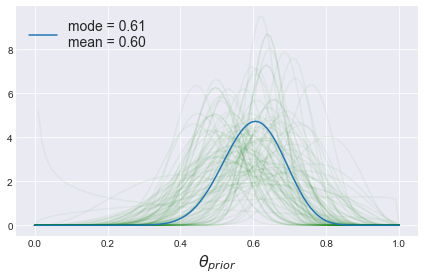

In [36]:
x = np.linspace(0, 1, 100)
for i in np.random.randint(0, len(chain_h), size=100):
    pdf = stats.beta(chain_h['alpha'][i], chain_h['beta'][i]).pdf(x)
    plt.plot(x, pdf, 'g', alpha=0.05)
    
dist = stats.beta(chain_h['alpha'].mean(), chain_h['beta'].mean())
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, label='mode = {:.2f}\nmean = {:.2f}'.format(mode, mean))

plt.legend(fontsize=14)
plt.xlabel(r'$\theta_{prior}$', fontsize=16)
plt.tight_layout()

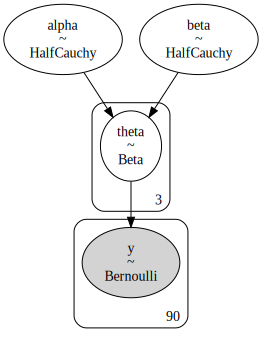

In [37]:
pm.model_to_graphviz(model_h)